# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dillon
Processing Record 2 of Set 1 | swan hill
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | tessalit
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | jamame
Processing Record 7 of Set 1 | marsh harbour
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | fairbanks
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | miramar
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | kampot
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | san cristobal
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Recor

Processing Record 39 of Set 4 | mandurah
Processing Record 40 of Set 4 | mbumi
Processing Record 41 of Set 4 | andevoranto
City not found. Skipping...
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | samusu
City not found. Skipping...
Processing Record 44 of Set 4 | shakhtinsk
Processing Record 45 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 46 of Set 4 | marzuq
Processing Record 47 of Set 4 | egvekinot
Processing Record 48 of Set 4 | narsaq
Processing Record 49 of Set 4 | geresk
City not found. Skipping...
Processing Record 0 of Set 5 | praia da vitoria
Processing Record 1 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 2 of Set 5 | jalu
Processing Record 3 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 5 | sakakah
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | poros
Processing Record 7 of Set 5 | terney
Processing Record 8 of Set 5 | naze
Processing Record 9 of Set

Processing Record 23 of Set 8 | ust-nera
Processing Record 24 of Set 8 | port augusta
Processing Record 25 of Set 8 | istok
Processing Record 26 of Set 8 | longlac
City not found. Skipping...
Processing Record 27 of Set 8 | hamilton
Processing Record 28 of Set 8 | reinosa
Processing Record 29 of Set 8 | plast
Processing Record 30 of Set 8 | tongren
Processing Record 31 of Set 8 | araouane
Processing Record 32 of Set 8 | eenhana
Processing Record 33 of Set 8 | rudsar
Processing Record 34 of Set 8 | cap malheureux
Processing Record 35 of Set 8 | dekoa
City not found. Skipping...
Processing Record 36 of Set 8 | bandarbeyla
Processing Record 37 of Set 8 | vardo
Processing Record 38 of Set 8 | inhambane
Processing Record 39 of Set 8 | nome
Processing Record 40 of Set 8 | pevek
Processing Record 41 of Set 8 | mwinilunga
Processing Record 42 of Set 8 | coolum beach
Processing Record 43 of Set 8 | brezno
Processing Record 44 of Set 8 | amqui
Processing Record 45 of Set 8 | jiroft
City not foun

City not found. Skipping...
Processing Record 9 of Set 12 | binabalian
Processing Record 10 of Set 12 | meulaboh
Processing Record 11 of Set 12 | asyut
Processing Record 12 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 13 of Set 12 | saquena
Processing Record 14 of Set 12 | przhevalskoye
Processing Record 15 of Set 12 | zhigansk
Processing Record 16 of Set 12 | nantucket
Processing Record 17 of Set 12 | khorramshahr
Processing Record 18 of Set 12 | kwinana
Processing Record 19 of Set 12 | la macarena
Processing Record 20 of Set 12 | angoram
Processing Record 21 of Set 12 | sitka
Processing Record 22 of Set 12 | russell
Processing Record 23 of Set 12 | presidencia roque saenz pena
Processing Record 24 of Set 12 | nikolsk
Processing Record 25 of Set 12 | kawalu
Processing Record 26 of Set 12 | tateyama
Processing Record 27 of Set 12 | nizhniy baskunchak
Processing Record 28 of Set 12 | conde
Processing Record 29 of Set 12 | jati
Processing Record 30 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dillon,34.4166,-79.3712,19.37,50,70,3.10,US,1673471705
1,swan hill,-35.3378,143.5544,25.37,25,47,2.28,AU,1673471705
2,punta arenas,-53.1500,-70.9167,15.62,47,0,10.29,CL,1673471705
3,tessalit,20.1986,1.0114,17.81,15,48,4.43,ML,1673471705
4,hermanus,-34.4187,19.2345,21.56,81,96,4.83,ZA,1673471706


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dillon,34.4166,-79.3712,19.37,50,70,3.10,US,1673471705
1,swan hill,-35.3378,143.5544,25.37,25,47,2.28,AU,1673471705
2,punta arenas,-53.1500,-70.9167,15.62,47,0,10.29,CL,1673471705
3,tessalit,20.1986,1.0114,17.81,15,48,4.43,ML,1673471705
4,hermanus,-34.4187,19.2345,21.56,81,96,4.83,ZA,1673471706


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

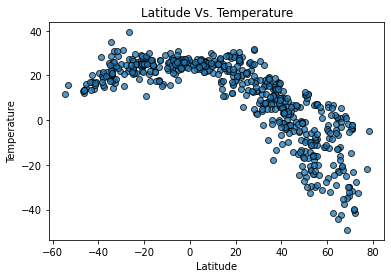

In [9]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude Vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

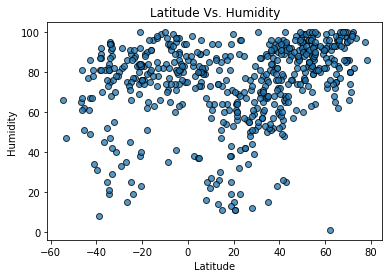

In [10]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude Vs. Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

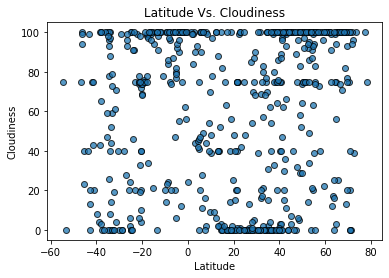

In [11]:
# Build the scatter plots for latitude vs. cloudiness

x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude Vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

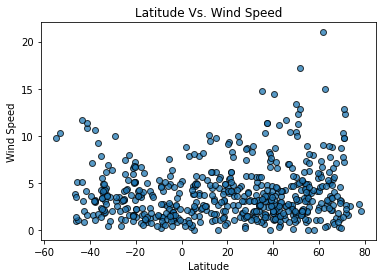

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude Vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
import scipy.stats as st

In [14]:
# Define a function to create Linear Regression plots
def linear_plots(x_axis, y_axis, title, text_coordinates):
    
    # Linear regression formula
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # plot
    plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)
    plt.plot(x_axis, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)

    plt.show()
    
    # Understanding the correlation
    correlation = st.pearsonr(x_axis, y_axis)
    print(f" The correllation between the two variables is {round(correlation[0],2)}")

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dillon,34.4166,-79.3712,19.37,50,70,3.10,US,1673471705
3,tessalit,20.1986,1.0114,17.81,15,48,4.43,ML,1673471705
5,jamame,0.0722,42.7506,24.76,86,24,5.15,SO,1673471706
6,marsh harbour,26.5412,-77.0636,22.49,55,13,1.75,BS,1673471706
7,kodiak,57.7900,-152.4072,0.73,80,40,0.00,US,1673471706


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,swan hill,-35.3378,143.5544,25.37,25,47,2.28,AU,1673471705
2,punta arenas,-53.1500,-70.9167,15.62,47,0,10.29,CL,1673471705
4,hermanus,-34.4187,19.2345,21.56,81,96,4.83,ZA,1673471706
11,new norfolk,-42.7826,147.0587,17.06,67,13,0.89,AU,1673471707
14,ushuaia,-54.8000,-68.3000,11.81,66,75,9.77,AR,1673471539


###  Temperature vs. Latitude Linear Regression Plot

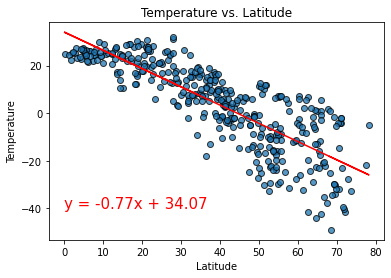

 The correllation between the two variables is -0.83


In [17]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
ylabel = "Temperature"
title = 'Temperature vs. Latitude'
linear_plots(x_axis, y_axis, title, (0, -40))

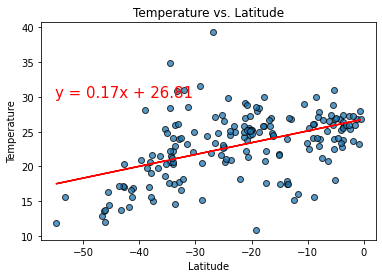

 The correllation between the two variables is 0.48


In [18]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
ylabel = "Temperature"
title = 'Temperature vs. Latitude'
linear_plots(x_axis, y_axis, title, (-55, 30))

**Discussion about the linear relationship:** The relaltionship between latitude and temperature between cities in the northern hemisphere shows a strong negative correllation of -0.84. This will suggest that the higher the latitude the lower the temperature will be.

The relationship between latitude and temperature between cities in the southern hemisphere shows a postive correllation of 0.53. this suggests that the close the latitude is to 0 the hotter the tempreture. 

When looking at both of these graphs we can see that cities with the highest temperatures are around a latitude of 0 (the equator). This would suggest that if you wanted to visit a warmer country you want to travel near the equator.

### Humidity vs. Latitude Linear Regression Plot

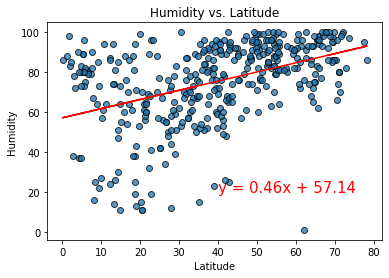

 The correllation between the two variables is 0.43


In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
ylabel = "Humidity"
title = 'Humidity vs. Latitude'
linear_plots(x_axis, y_axis, title, (40,20))

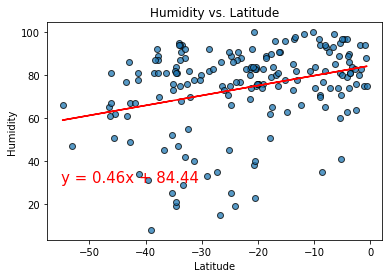

 The correllation between the two variables is 0.31


In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
ylabel = "Humidity"
title = 'Humidity vs. Latitude'
linear_plots(x_axis, y_axis, title, (-55, 30))

**Discussion about the linear relationship:** The relaltionship between latitude and humidity between cities in the northern hemisphere shows a positive correllation of 0.46. This will suggest that the higher the latitude of the city the more humidity will be present.

The relationship between latitude and humidty between cities in the southern hemisphere shows a weak postive correllation of 0.25. This also suggests that the higher the latitude of the city the more humidity will be present. this however is an extremely weak relationship so you can see from the data that isnt alway the case.

When looking at both of these graphs we can see that cities with the highest humidty are the cities that have the highest lattitudes. The correllation of both factors is quite weak which shows there isnt a strong positive correllation between these two variables. 

### Cloudiness vs. Latitude Linear Regression Plot

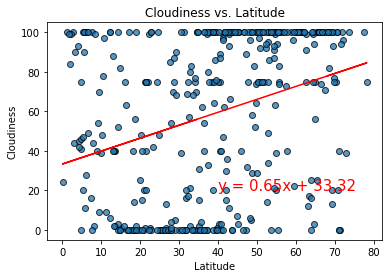

 The correllation between the two variables is 0.32


In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"
title = 'Cloudiness vs. Latitude'
linear_plots(x_axis, y_axis, title, (40,20))

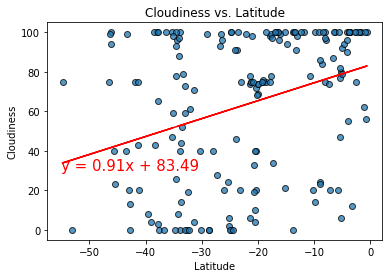

 The correllation between the two variables is 0.33


In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
ylabel = "Cloudiness"
title = 'Cloudiness vs. Latitude'
linear_plots(x_axis, y_axis, title, (-55, 30))

**Discussion about the linear relationship:** The relationship between cloudiness and lattitude in the northern hemisphere shows a slightly weak positive correllation of 0.4. This would suggest that the higher the latitude in the northern hemisphere, the more likely there are more clouds present.

The relationship between cloudiness and lattitude in the southern hemisphere shows a slightly weak positive correllation of 0.34. This would also suggest that the higher the latitude in the southern hemisphere, the more amount of clouds are present. This however is a very weak relationship so that wont always be the case.

### Wind Speed vs. Latitude Linear Regression Plot

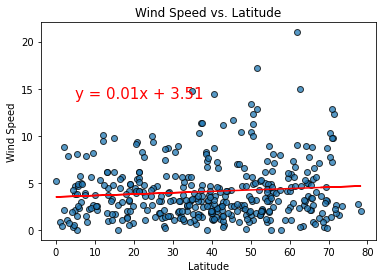

 The correllation between the two variables is 0.09


In [23]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"
title = 'Wind Speed vs. Latitude'
linear_plots(x_axis, y_axis, title, (5, 14))

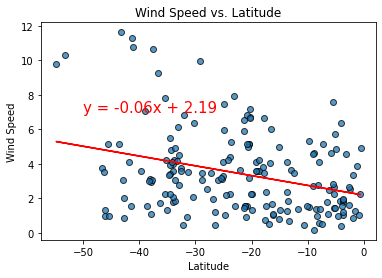

 The correllation between the two variables is -0.32


In [24]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
ylabel = "Wind Speed"
title = 'Wind Speed vs. Latitude'
linear_plots(x_axis, y_axis, title, (-50, 7))

**Discussion about the linear relationship:** The correllation between wind speed and latitude in the northern hemisphere is extremely weak at 0.11. this would suggest that there isnt a relationship between wind speed and latitude in the northern hemisphere.

The correllation between wind speed and latitude in the southern hemisphere is extremely weak at - 0.22. this would also suggest that there isnt a relationship between wind speed and latitude in the southern hemisphere.

When looking at both of these graphs the data would suggest that there isnt a relationship between wind speed and latitude.
